# Annotation parsing

We can use this file to check that our annotations (and any rescaling) matches up to what we expect or if there is a bug in the script

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import xml.etree as etree
import zipfile
import os
import re
import pandas as pd
import tqdm

In [3]:
sys.path.insert(1, '/Users/guillaumekugener/Documents/USC/USC_docs/ml/surgical-training-project/tools')
from utils import plot_frame_with_bb, make_frame_object_from_file

Image size: (720, 720, 3)
suction coordinates: [289.0, 507.00000000000006, 411.0, 719.0]
cottonoid coordinates: [305.0, 603.0, 372.00000000000006, 596.0]
muscle coordinates: [436.99999999999994, 574.0, 420.0, 589.0]
string coordinates: [310.0, 340.0, 482.99999999999994, 609.0]


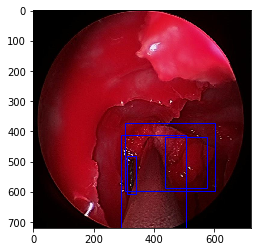

In [4]:
image_dir = '/Users/guillaumekugener/Documents/USC/USC_docs/ml/datasets/large-clean-surgical-ds/JPEGImages/'
annotation_dir = '/Users/guillaumekugener/Documents/USC/USC_docs/ml/datasets/cvat_output/Annotations/'

fid = 10000


plot_frame_with_bb(
    image_path=os.path.join(image_dir, 'S306T1_frame_' + str(fid).zfill(8) + '.jpeg'),
    annotation_path = os.path.join(annotation_dir, 'S306T1_frame_' + str(fid).zfill(8) + '.xml')
)

Image size: (720, 1280, 3)
suction coordinates: [562.77, 799.1299999999999, 411.4, 718.54]
cottonoid coordinates: [580.63, 903.5000000000001, 371.87, 596.17]
muscle coordinates: [723.57, 872.8, 420.1, 589.47]
string coordinates: [585.2, 618.1, 483.49999999999994, 609.4]


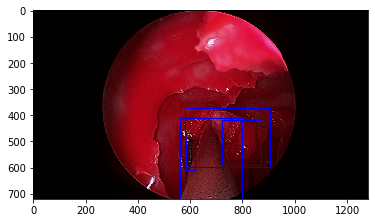

In [5]:
plot_frame_with_bb(
    image_path='/Users/guillaumekugener/Downloads/S306T1/frame_' + str(fid).zfill(8) + '.jpeg',
    annotation_path = os.path.join(annotation_dir, 'TEST/S306T1_frame_' + str(fid).zfill(8) + '.xml')
)

In [10]:
# Make a single csv for the outputs 
all_annotation_frames = [os.path.join(annotation_dir, a) for a in os.listdir(annotation_dir) if re.search('xml$', a)]
all_annotation_frames.sort()

100%|██████████| 22664/22664 [00:05<00:00, 3957.05it/s]


In [12]:
final_data_df.head()

,video_id,frame_id,tool,score,x1,y1,x2,y2
0,S306T1,00001730,suction,1,0.134722,0.490278,0.462500,1.0
1,S306T1,00001731,suction,1,0.136111,0.491667,0.463889,1.0
2,S306T1,00001732,suction,1,0.136111,0.493056,0.465278,1.0
3,S306T1,00001733,suction,1,0.137500,0.494444,0.466667,1.0
4,S306T1,00001734,suction,1,0.137500,0.497222,0.469444,1.0
